In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

# # !pip install category_encoders

In [3]:
# crime_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data-LA-Project/Mar424_converted_77_Features')
# print(crime_df.shape)

In [4]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [5]:
# Load the dataset
crime_df=pd.read_csv("Min_downsampled_df_Mar7_ 539576.csv", na_values=['NULL', '?', 'NONE', ' '])

print("Shape of dataset:",crime_df.shape)
crime_df.columns

Shape of dataset: (539576, 77)


Index(['Date_Rptd', 'DATE_OCC', 'TIME_OCC', 'AREA_NAME', 'Rpt_Dist_No',
       'Part_1-2', 'Crm_Cd', 'Crm_Cd_Desc', 'Vict_Age', 'LAT', 'LON',
       'Avg_Temp', 'Avg_Dewpoint', 'Avg_Humidity', 'Avg_Windspeed',
       'Avg_Pressure', 'Total_Precipitation', 'Crime_Category',
       'Crime_Category_Code', 'Weapon_Reported', 'Vict_Sex_M', 'Vict_Sex_X',
       'AREA_2', 'AREA_3', 'AREA_4', 'AREA_5', 'AREA_6', 'AREA_7', 'AREA_8',
       'AREA_9', 'AREA_10', 'AREA_11', 'AREA_12', 'AREA_13', 'AREA_14',
       'AREA_15', 'AREA_16', 'AREA_17', 'AREA_18', 'AREA_19', 'AREA_20',
       'AREA_21', 'Region_Ethnic_Origin_Black',
       'Region_Ethnic_Origin_Hispanic/Latin/Mexican',
       'Region_Ethnic_Origin_Other', 'Region_Ethnic_Origin_Unknown',
       'Region_Ethnic_Origin_White', 'Day_of_Week_1', 'Day_of_Week_2',
       'Day_of_Week_3', 'Day_of_Week_4', 'Day_of_Week_5', 'Day_of_Week_6',
       'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7',
       'Month_8', 'Month_9', 'Month_1

In [6]:
# Convert 'Date_Rptd' and 'DATE_OCC' to datetime
crime_df['Date_Rptd'] = pd.to_datetime(crime_df['Date_Rptd'])

In [7]:
crime_df.columns

Index(['Date_Rptd', 'DATE_OCC', 'TIME_OCC', 'AREA_NAME', 'Rpt_Dist_No',
       'Part_1-2', 'Crm_Cd', 'Crm_Cd_Desc', 'Vict_Age', 'LAT', 'LON',
       'Avg_Temp', 'Avg_Dewpoint', 'Avg_Humidity', 'Avg_Windspeed',
       'Avg_Pressure', 'Total_Precipitation', 'Crime_Category',
       'Crime_Category_Code', 'Weapon_Reported', 'Vict_Sex_M', 'Vict_Sex_X',
       'AREA_2', 'AREA_3', 'AREA_4', 'AREA_5', 'AREA_6', 'AREA_7', 'AREA_8',
       'AREA_9', 'AREA_10', 'AREA_11', 'AREA_12', 'AREA_13', 'AREA_14',
       'AREA_15', 'AREA_16', 'AREA_17', 'AREA_18', 'AREA_19', 'AREA_20',
       'AREA_21', 'Region_Ethnic_Origin_Black',
       'Region_Ethnic_Origin_Hispanic/Latin/Mexican',
       'Region_Ethnic_Origin_Other', 'Region_Ethnic_Origin_Unknown',
       'Region_Ethnic_Origin_White', 'Day_of_Week_1', 'Day_of_Week_2',
       'Day_of_Week_3', 'Day_of_Week_4', 'Day_of_Week_5', 'Day_of_Week_6',
       'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7',
       'Month_8', 'Month_9', 'Month_1

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

from sklearn.preprocessing import scale

In [9]:
# Selecting predictor and target variables

X = crime_df.drop(['Date_Rptd','Rpt_Dist_No','DATE_OCC', 'TIME_OCC', 'AREA_NAME', 'Crm_Cd_Desc', 'Crm_Cd', 'Crime_Category_Code','Crime_Category'], axis=1)
y = crime_df['Crime_Category']

In [10]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
# Scale the data using the StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Logistic Regression- Full: lr_full

In [12]:
# Training the model and predicting- LR-Full data

logreg = LogisticRegression(solver='saga', max_iter=1000)
logreg.fit(X_train_scaled, y_train.ravel()) # ravel to flatten data
y_pred = logreg.predict(X_test_scaled)

print("Logistic Regression")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}\n")

# Classification report of the target variable.
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

Logistic Regression
Accuracy: 0.5064401942251381
Confusion Matrix:
[[ 9395   156    12  3225   527     4   127    74]
 [   23  7622    51     0   772    81  2311  2667]
 [ 1967   943  1846   305   834  5595  1180   895]
 [  251    99     5 12163   693    42   123   104]
 [ 1282  2634    15  2416  3698   149   956  2288]
 [   14   111  1561   495    78 10799    57    86]
 [  931  4374   104    37   638   208  3817  3414]
 [  645  4135    92     0   810     0  2667  5313]]

Classification Report:
                                    precision    recall  f1-score   support

Assault, Battery and Other Violent       0.65      0.69      0.67     13520
        Fraud and Financial Crimes       0.38      0.56      0.45     13527
              Miscellaneous Crimes       0.50      0.14      0.21     13565
             Robbery and Extortion       0.65      0.90      0.76     13480
                   Sexual Offenses       0.46      0.28      0.34     13438
                Theft and Burglary       0.

In [13]:
# Feature importances
feature_importances = logreg.coef_[0]
features = X.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Set pandas option to display all rows
pd.set_option('display.max_rows', None)

# Print the full list of feature importances
print("Feature Importances:")
print(feature_importance_df.sort_values(by='Importance', ascending=False))

Feature Importances:
                                        Feature  Importance
10                              Weapon_Reported    2.469626
33                   Region_Ethnic_Origin_Black    0.231072
1                                      Vict_Age    0.224457
34  Region_Ethnic_Origin_Hispanic/Latin/Mexican    0.188817
11                                   Vict_Sex_M    0.185587
0                                      Part_1-2    0.115367
67                                    Year_2023    0.114270
2                                           LAT    0.064804
65                                    Year_2021    0.063631
4                                      Avg_Temp    0.062761
43                                Day_of_Week_6    0.060428
54                                     Month_12    0.055882
5                                  Avg_Dewpoint    0.054559
63                                    Year_2019    0.053769
16                                       AREA_5    0.050928
47                 

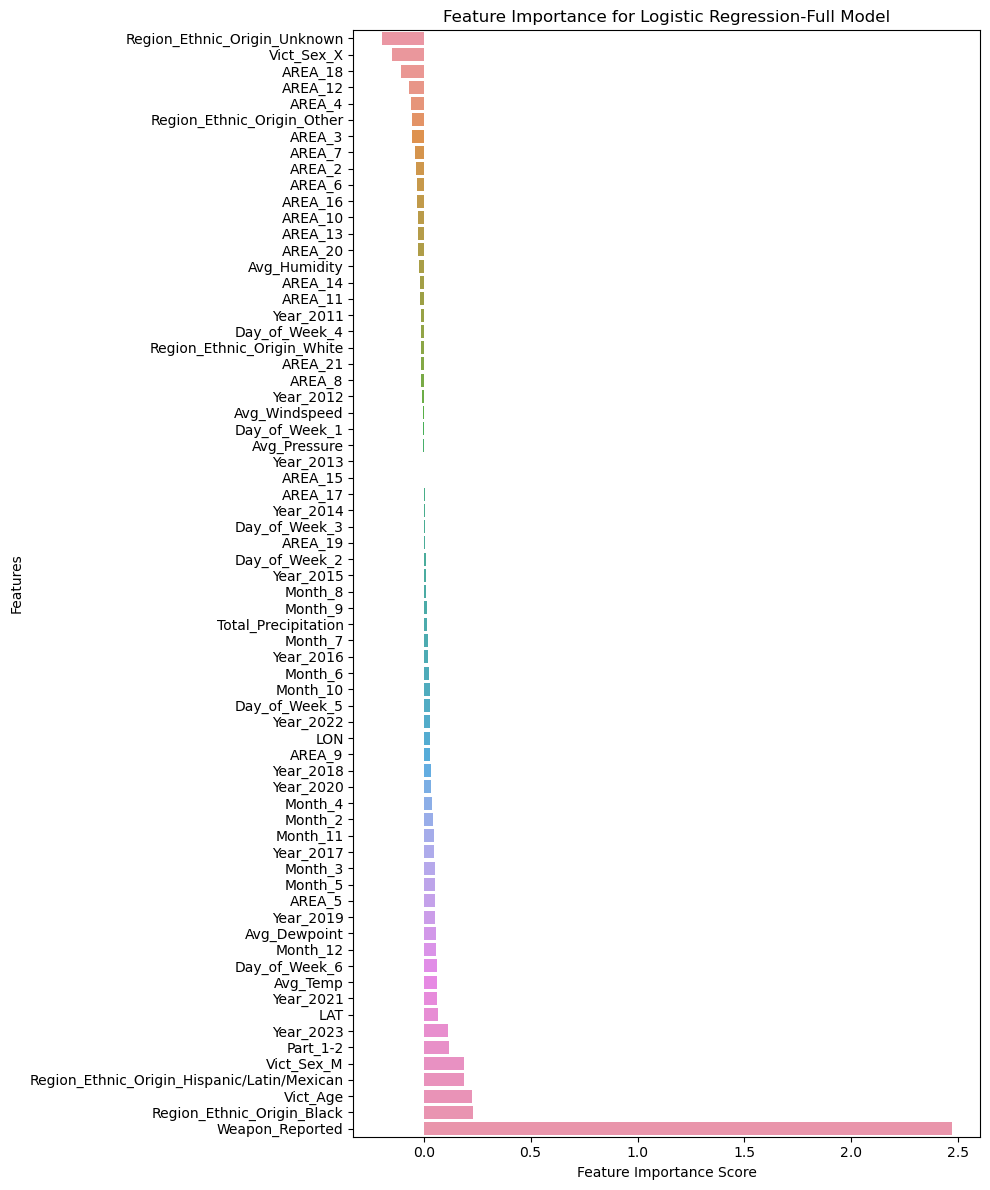

In [14]:
# Feature importances
features = X.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sort the DataFrame by importance score in ascending order for the plot
feature_importance_df_sorted = feature_importance_df.sort_values(by='Importance', ascending=True)

# Create a horizontal bar plot
plt.figure(figsize=(10, 12))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df_sorted)

# Add labels and title to the plot
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance for Logistic Regression-Full Model')

# Show the plot
plt.tight_layout()  # Adjust the layout to fit all the labels
plt.show()

#

## Model XGBOOST -Full: xgboost_full

In [15]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
label_encoder = LabelEncoder()

# Fit the encoder to the target variable and transform it to integer labels
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Now, train your XGBClassifier with the encoded target variable
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train_scaled, y_train_encoded)

# Predict on the scaled test set using the trained model
y_pred = xgb_model.predict(X_test_scaled)

# If you need to convert predictions back to original labels for interpretation
y_pred_labels = label_encoder.inverse_transform(y_pred)

print("XGBoost")

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Calculate the accuracy using the encoded test labels
accuracy = accuracy_score(y_test_encoded, y_pred)
print(f"Accuracy: {accuracy}")

# Calculate the confusion matrix using the encoded test labels
conf_matrix = confusion_matrix(y_test_encoded, y_pred)
print(f"Confusion Matrix:\n{conf_matrix}\n")

# Calculate the classification report using the original string labels
# Convert encoded predictions back to original labels for interpretability
y_pred_labels = label_encoder.inverse_transform(y_pred)
class_report = classification_report(y_test, y_pred_labels)
print(f"Classification Report:\n{class_report}")

XGBoost
Accuracy: 0.5468883205456095
Confusion Matrix:
[[ 9133   140   442  2943   661     9    94    98]
 [   22  8070    87     6   594    85  2217  2446]
 [ 1039   862  4162   298   628  4834   836   906]
 [  261   108    11 11673  1185    58   120    64]
 [  878  2574   268  1417  5347   139   930  1885]
 [    8   111  2104   426   126 10284    59    83]
 [  842  4136   212    46   439   204  4250  3394]
 [  610  3664   201     3   592     5  2488  6099]]

Classification Report:
                                    precision    recall  f1-score   support

Assault, Battery and Other Violent       0.71      0.68      0.69     13520
        Fraud and Financial Crimes       0.41      0.60      0.49     13527
              Miscellaneous Crimes       0.56      0.31      0.40     13565
             Robbery and Extortion       0.69      0.87      0.77     13480
                   Sexual Offenses       0.56      0.40      0.46     13438
                Theft and Burglary       0.66      0.78

In [16]:
# Feature importances
feature_importances = xgb_model.feature_importances_
features = X.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Set pandas option to display all rows
pd.set_option('display.max_rows', None)

# Print the full list of feature importances
print("Feature Importances:")
print(feature_importance_df.sort_values(by='Importance', ascending=False))

Feature Importances:
                                        Feature  Importance
10                              Weapon_Reported    0.367613
0                                      Part_1-2    0.338140
12                                   Vict_Sex_X    0.047036
11                                   Vict_Sex_M    0.032166
35                   Region_Ethnic_Origin_Other    0.016502
36                 Region_Ethnic_Origin_Unknown    0.014623
1                                      Vict_Age    0.013556
16                                       AREA_5    0.013408
34  Region_Ethnic_Origin_Hispanic/Latin/Mexican    0.007256
67                                    Year_2023    0.005721
25                                      AREA_14    0.005386
43                                Day_of_Week_6    0.005313
33                   Region_Ethnic_Origin_Black    0.004858
66                                    Year_2022    0.004368
15                                       AREA_4    0.004328
37                 

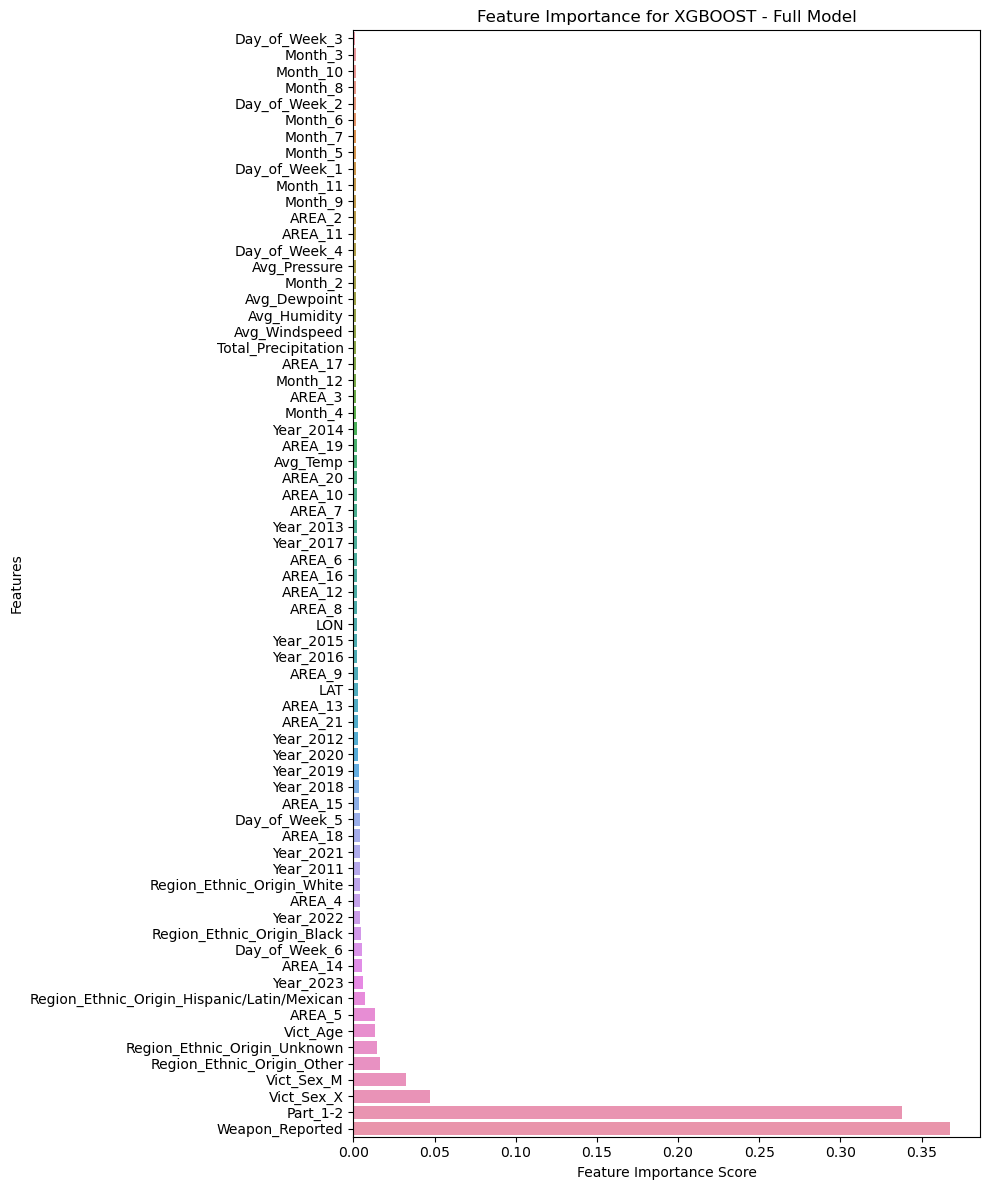

In [17]:
# Feature importances
feature_importances = xgb_model.feature_importances_
features = X.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sort the DataFrame by importance score in ascending order for the plot
feature_importance_df_sorted = feature_importance_df.sort_values(by='Importance', ascending=True)

# Create a horizontal bar plot
plt.figure(figsize=(10, 12))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df_sorted)

# Add labels and title to the plot
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance for XGBOOST - Full Model')

# Show the plot
plt.tight_layout()  # Adjust the layout to fit all the labels
plt.show()

## Model Random Forest -Full: rf_full

In [18]:
# Create a random forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the random forest classifier
rf.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = rf.predict(X_test_scaled)

# Evaluate the random forest classifier
accuracy_rf = accuracy_score(y_test, y_pred)
print("Accuracy of the random forest classifier:", accuracy_rf)

# Calculate the confusion matrix using the encoded test labels
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{conf_matrix}\n")

# Classification report of the target variable.
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

Accuracy of the random forest classifier: 0.5720097112569035
Confusion Matrix:
[[ 9350   126   401  2801   599    14   152    77]
 [   31  7818   146     3   714    82  2605  2128]
 [ 1065   774  4577   251   573  4715   909   701]
 [  349   100    23 11689  1111    48   108    52]
 [  763  1976   268  1316  6727   135  1043  1210]
 [   19   113  2066   439   113 10314    67    70]
 [  824  3878   311    33   567   200  4892  2818]
 [  545  3066   283     2   699     8  2697  6362]]

Classification Report:
                                    precision    recall  f1-score   support

Assault, Battery and Other Violent       0.72      0.69      0.71     13520
        Fraud and Financial Crimes       0.44      0.58      0.50     13527
              Miscellaneous Crimes       0.57      0.34      0.42     13565
             Robbery and Extortion       0.71      0.87      0.78     13480
                   Sexual Offenses       0.61      0.50      0.55     13438
                Theft and Burgl

In [19]:
# Feature importances
feature_importances = rf.feature_importances_
features = X.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Set pandas option to display all rows
pd.set_option('display.max_rows', None)

# Print the full list of feature importances
print("Feature Importances:")
print(feature_importance_df.sort_values(by='Importance', ascending=False))

Feature Importances:
                                        Feature  Importance
10                              Weapon_Reported    0.117309
0                                      Part_1-2    0.117244
1                                      Vict_Age    0.083771
2                                           LAT    0.075998
3                                           LON    0.075840
6                                  Avg_Humidity    0.057765
4                                      Avg_Temp    0.057271
5                                  Avg_Dewpoint    0.056669
7                                 Avg_Windspeed    0.055488
8                                  Avg_Pressure    0.027221
11                                   Vict_Sex_M    0.018838
12                                   Vict_Sex_X    0.008942
41                                Day_of_Week_4    0.008548
35                   Region_Ethnic_Origin_Other    0.008374
39                                Day_of_Week_2    0.008291
38                 

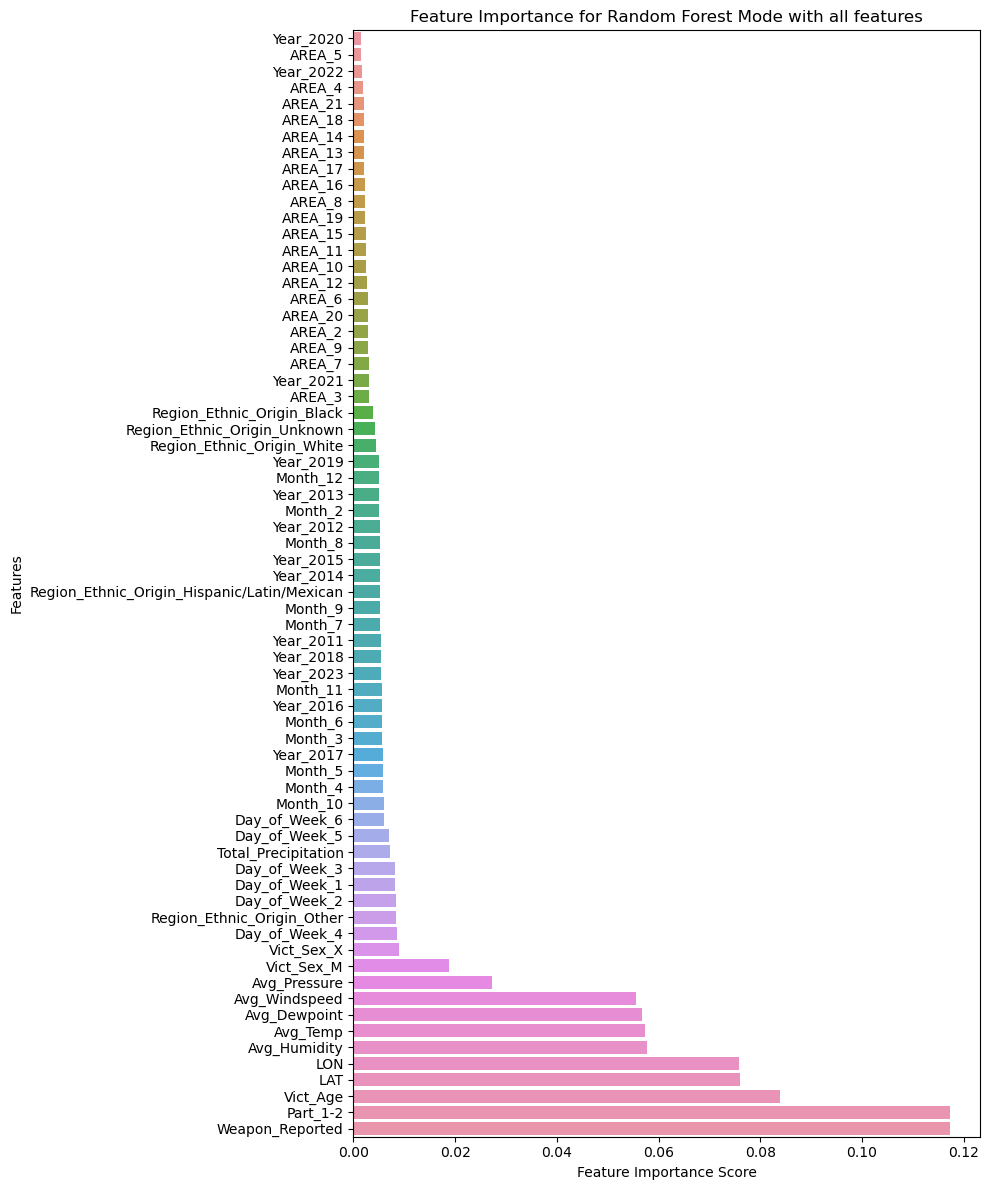

In [20]:
# Feature importances
feature_importances = rf.feature_importances_
features = X.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sort the DataFrame by importance score in ascending order for the plot
feature_importance_df_sorted = feature_importance_df.sort_values(by='Importance', ascending=True)

# Create a horizontal bar plot
plt.figure(figsize=(10, 12))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df_sorted)

# Add labels and title to the plot
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance for Random Forest Mode with all features')

# Show the plot
plt.tight_layout()  # Adjust the layout to fit all the labels
plt.show()

## Model KNN7 -Full: knn_full

In [21]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

print("KNN")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}\n")

# Classification report of the target variable.
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

KNN
Accuracy: 0.32479891767671154
Confusion Matrix:
[[5944 1245  768 2496 1473  262  647  685]
 [ 927 5974  876  233 1601  427 1789 1700]
 [1601 2022 3378 1043 1325 2299  981  916]
 [3220  543  739 6808 1036  603  265  266]
 [2296 2787  948 1496 3283  469 1033 1126]
 [ 784 1822 3076 1416  962 3787  692  662]
 [1525 3854 1068  494 1500  559 2594 1929]
 [1334 3467 1029  373 1622  457 2097 3283]]

Classification Report:
                                    precision    recall  f1-score   support

Assault, Battery and Other Violent       0.34      0.44      0.38     13520
        Fraud and Financial Crimes       0.28      0.44      0.34     13527
              Miscellaneous Crimes       0.28      0.25      0.27     13565
             Robbery and Extortion       0.47      0.51      0.49     13480
                   Sexual Offenses       0.26      0.24      0.25     13438
                Theft and Burglary       0.43      0.29      0.34     13201
     Vandalism and Property Damage       0.26 

In [22]:
# Take too long?

# from sklearn.inspection import permutation_importance

# # Calculating permutation feature importance
# perm_importance = permutation_importance(knn, X_test_scaled, y_test, n_repeats=10, random_state=42)

# # Map the importances to the feature names and sort them
# feature_names = X.columns
# feature_importance_df = pd.DataFrame({
#     'Feature': feature_names,
#     'Importance': perm_importance.importances_mean
# }).sort_values(by='Importance', ascending=False)

# # Plotting the feature importances
# plt.figure(figsize=(10, 12))
# sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
# plt.xlabel('Permutation Importance')
# plt.ylabel('Features')
# plt.title('Permutation Feature Importance for KNN Model')
# plt.tight_layout()  # Adjust the layout to fit all the labels
# plt.show()

In [23]:
# X columns
print('Shape of X:', X.shape)
print(X.columns)

Shape of X: (539576, 68)
Index(['Part_1-2', 'Vict_Age', 'LAT', 'LON', 'Avg_Temp', 'Avg_Dewpoint',
       'Avg_Humidity', 'Avg_Windspeed', 'Avg_Pressure', 'Total_Precipitation',
       'Weapon_Reported', 'Vict_Sex_M', 'Vict_Sex_X', 'AREA_2', 'AREA_3',
       'AREA_4', 'AREA_5', 'AREA_6', 'AREA_7', 'AREA_8', 'AREA_9', 'AREA_10',
       'AREA_11', 'AREA_12', 'AREA_13', 'AREA_14', 'AREA_15', 'AREA_16',
       'AREA_17', 'AREA_18', 'AREA_19', 'AREA_20', 'AREA_21',
       'Region_Ethnic_Origin_Black',
       'Region_Ethnic_Origin_Hispanic/Latin/Mexican',
       'Region_Ethnic_Origin_Other', 'Region_Ethnic_Origin_Unknown',
       'Region_Ethnic_Origin_White', 'Day_of_Week_1', 'Day_of_Week_2',
       'Day_of_Week_3', 'Day_of_Week_4', 'Day_of_Week_5', 'Day_of_Week_6',
       'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7',
       'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12', 'Year_2011',
       'Year_2012', 'Year_2013', 'Year_2014', 'Year_2015', 'Year_2016',
       

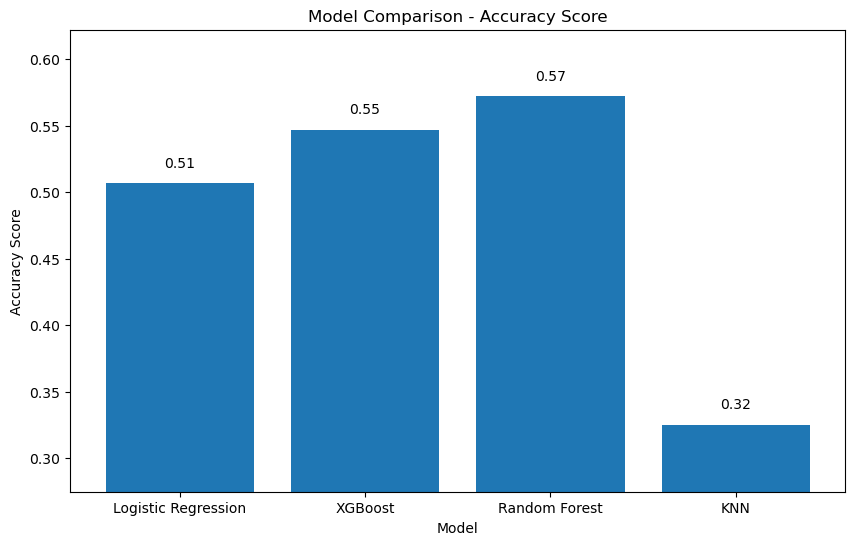

In [24]:
import matplotlib.pyplot as plt

# Placeholder for accuracy scores
accuracy_scores = {}

# Logistic Regression
logreg_accuracy = accuracy_score(y_test, logreg.predict(X_test_scaled))
accuracy_scores['Logistic Regression'] = logreg_accuracy

# XGBoost
y_pred_xgb = xgb_model.predict(X_test_scaled)
xgb_accuracy = accuracy_score(y_test_encoded, y_pred_xgb)
accuracy_scores['XGBoost'] = xgb_accuracy

# Random Forest
rf_accuracy = accuracy_score(y_test, rf.predict(X_test_scaled))
accuracy_scores['Random Forest'] = rf_accuracy

# KNN
knn_accuracy = accuracy_score(y_test, knn.predict(X_test_scaled))
accuracy_scores['KNN'] = knn_accuracy

# Now create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(accuracy_scores.keys(), accuracy_scores.values())
plt.xlabel('Model')
plt.ylabel('Accuracy Score')
plt.title('Model Comparison - Accuracy Score')
plt.ylim([min(accuracy_scores.values()) - 0.05, max(accuracy_scores.values()) + 0.05])
for i, v in enumerate(accuracy_scores.values()):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', va='bottom')

plt.show()
